In [1]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Charger les données
dataset = pd.read_csv('heart_diseases.csv')

X = dataset.dropna().drop('num', axis=1)
y = dataset.dropna()['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)

# Appliquer le suréchantillonnage aux données d'entraînement
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Vérifier la nouvelle distribution des classes
class_distribution_resampled = pd.Series(y_resampled).value_counts().sort_index()

# Créer un DataFrame pour les nouvelles données
df_resampled = pd.DataFrame(data=X_resampled, columns=X_train.columns)
df_resampled['Labels'] = y_resampled

# Normaliser les fonctionnalités
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialiser les modèles
svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
sgd_model = SGDClassifier()
mlp_model = MLPClassifier()

# Entraîner les modèles
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Faire des prédictions
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calculer les scores d'exactitude
svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

# Afficher les scores
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SGD Accuracy:", sgd_accuracy)
print("MLP Accuracy:", mlp_accuracy)

SVM Accuracy: 0.65
Decision Tree Accuracy: 0.55
Random Forest Accuracy: 0.6
SGD Accuracy: 0.6
MLP Accuracy: 0.6166666666666667


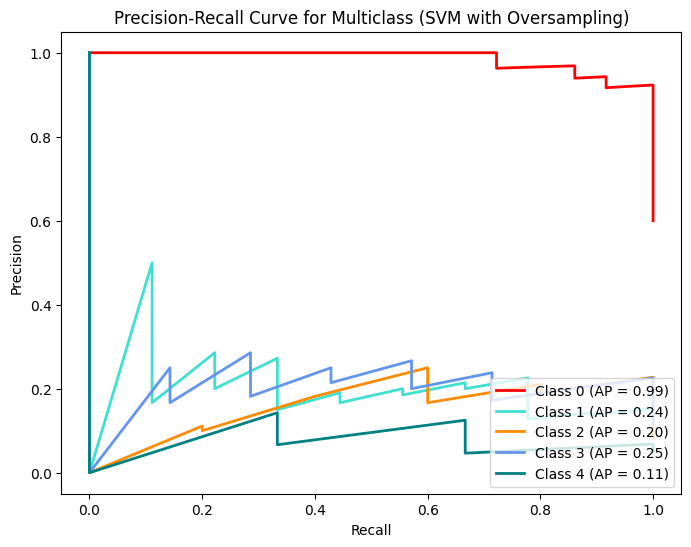

In [2]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Suréchantillonnage
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Normaliser les fonctionnalités
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle SVM
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

# Prédire les scores des classes
y_scores = svm_model.decision_function(X_test_scaled)

# Convertir les étiquettes en encodage binaire
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Calculer la courbe Precision-Recall pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):  # 5 classes dans votre exemple
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

# Tracer les courbes Precision-Recall pour chaque classe
plt.figure(figsize=(8, 6))
colors = ['red', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']
for i, color in zip(range(5), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass (SVM with Oversampling)')
plt.legend(loc='lower right')
plt.show()

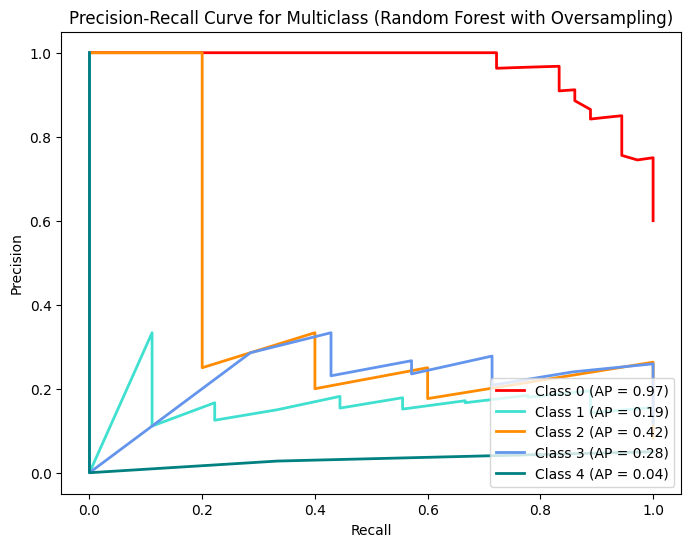

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Suréchantillonnage
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Normaliser les fonctionnalités
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Prédire les scores des classes
y_scores = rf_model.predict_proba(X_test_scaled)

# Convertir les étiquettes en encodage binaire
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Calculer la courbe Precision-Recall pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):  # 5 classes dans votre exemple
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

# Tracer les courbes Precision-Recall pour chaque classe
plt.figure(figsize=(8, 6))
colors = ['red', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']
for i, color in zip(range(5), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass (Random Forest with Oversampling)')
plt.legend(loc='lower right')
plt.show()

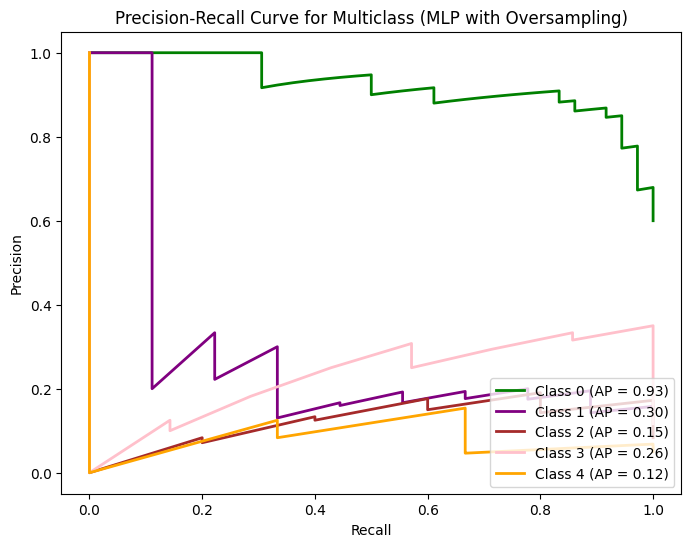

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Suréchantillonnage
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Normaliser les fonctionnalités
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

# Prédire les scores des classes
y_scores_mlp = mlp_model.predict_proba(X_test_scaled)

# Convertir les étiquettes en encodage binaire
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Calculer la courbe Precision-Recall pour chaque classe
precision_mlp = dict()
recall_mlp = dict()
average_precision_mlp = dict()

for i in range(5):  # 5 classes dans votre exemple
    precision_mlp[i], recall_mlp[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores_mlp[:, i])
    average_precision_mlp[i] = average_precision_score(y_test_bin[:, i], y_scores_mlp[:, i])

# Tracer les courbes Precision-Recall pour chaque classe
plt.figure(figsize=(8, 6))
colors = ['green', 'purple', 'brown', 'pink', 'orange']
for i, color in zip(range(5), colors):
    plt.plot(recall_mlp[i], precision_mlp[i], color=color, lw=2,
             label=f'Class {i} (AP = {average_precision_mlp[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass (MLP with Oversampling)')
plt.legend(loc='lower right')
plt.show()

SVM:

Class 0 (AP = 0.99): Very good classification performance for this class.
Class 1 (AP = 0.24): Relatively low performance, possibly challenging to distinguish.
Class 2 (AP = 0.20): Low performance.
Class 3 (AP = 0.25): Relatively low performance.
Class 4 (AP = 0.11): Low performance.
Random Forest (RF):

Class 0 (AP = 0.97): Very good performance.
Class 1 (AP = 0.19): Relatively low performance.
Class 2 (AP = 0.42): Relatively good performance.
Class 3 (AP = 0.28): Average performance.
Class 4 (AP = 0.04): Low performance.
MLP (Multilayer Perceptron):

Class 0 (AP = 0.93): Very good performance.
Class 1 (AP = 0.30): Relatively good performance.
Class 2 (AP = 0.15): Low performance.
Class 3 (AP = 0.26): Average performance.
Class 4 (AP = 0.12): Low performance.

For all classes, SVM and Random Forest seem to have similar performances, with Random Forest performing better for class 2.
MLP also shows good performance, but perhaps not as high as SVM or Random Forest for some classes.

For me, the most promising classification is SVM because for these datas, SVM has the best accuracy score and the best precision-recall curve.

SVM Accuracy: 0.65
Decision Tree Accuracy: 0.5666666666666667
Random Forest Accuracy: 0.6166666666666667
SGD Accuracy: 0.6
MLP Accuracy: 0.6